# Pruebas de Hipótesis

En este webinar, resolveremos ejercicios con pruebas de hipótesis. Específicamente, resolveremos pruebas de hipótesis para:
- Diferencia de medias
- Diferencia de varianzas
- Test no parametrico

Finalmente, como ejercicio adicional, resolveremos juntos una **prueba de hipótesis no paramétrica**.

Los datos que usaremos para nuestras pruebas vienen de un experimento psicológico, en el que personas tenían que resolver anagramas (formar palabras con las letras de otra palabra) de memoria.

Una explicación de las columnas:

* subject: un identificador para el sujeto de prueba.
* attention: el experimento se corrió bajo dos escenarios:
    * la persona estaba con la atención solo en el anagrama ("focused").
    * la persona estaba con la atención en otra tarea además del anagrama ("divided").
* solutions: el número de posibles soluciones del anagrama.
* score: una calificación numérica para evaluar el resultado del anagrama de la persona.

Fuente: https://seaborn.pydata.org/tutorial/data_structure.html

In [29]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [30]:
attention_df = sns.load_dataset('attention')
attention_df.head()

,Unnamed: 0,subject,attention,solutions,score
0,0,1,divided,1,2.0
1,1,2,divided,1,3.0
2,2,3,divided,1,3.0
3,3,4,divided,1,5.0
4,4,5,divided,1,4.0


In [31]:
attention_df.solutions.unique()

array([1, 2, 3], dtype=int64)

# Diferencia de Medias

Para este primer ejercicio, resolvamos esta pregunta:

- ¿El promedio de `score` es diferente para anagramas que tienen 1 y 2 soluciones?

Hagamos una inspección visual de la distribución primero:

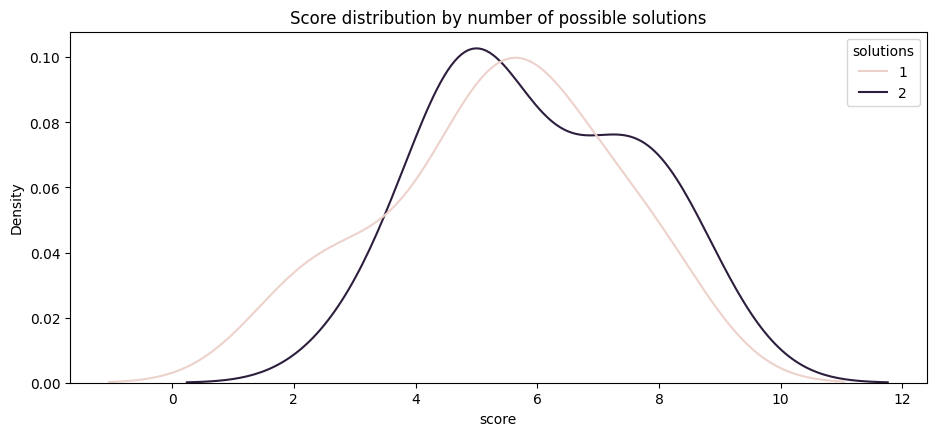

In [32]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.set_title("Score distribution by number of possible solutions")
sns.kdeplot(data=attention_df[attention_df["solutions"].isin([1, 2])], x="score", hue="solutions", ax=ax)

fig.tight_layout(pad=3.0)

In [33]:
attention_df.groupby("solutions")["subject"].count()

solutions
1    20
2    20
3    20
Name: subject, dtype: int64

1. Planteen la hipótesis nula e hipótesis alternativa.

Definimos como $\mu_1$ y $\mu_2$ como los promedios de los scores para los anagramas de 1 y 2 soluciones respectivamente. De esta forma nuestra definimos nuestras hipotesis como:

* $H_0$: Los promedios de scores para los anagramas de 1 y 2 soluciones son iguales, es decir $\mu_1 = \mu_2$, o  de manera alternativa $\mu_1 - \mu_2 = 0$
* $H_1$: Los promedios de scores para los anagramas de 1 y 2 soluciones son distintos, es decir $\mu_1 \neq \mu_2$, o de manera alternativa $\mu_1 - \mu_2 \neq 0$




2. Determinen un nivel de significancia.

Usaremos un nivel de significancia del 95%

3. Calcula el estadístico de prueba.

In [34]:
from scipy.stats import ttest_ind

In [35]:
scores_anagramas_1 = attention_df[attention_df['solutions'] == 1].score
scores_anagramas_2 = attention_df[attention_df['solutions'] == 2].score

print(scores_anagramas_1.mean(), scores_anagramas_2.mean())

5.35 5.975


In [39]:
print(attention_df.min(), attention_df.max() )

Unnamed: 0          0
subject             1
attention     divided
solutions           1
score             2.0
dtype: object Unnamed: 0         59
subject            20
attention     focused
solutions           3
score             9.0
dtype: object


In [38]:
print(scores_anagramas_1.var(), scores_anagramas_2.var())

3.3973684210526316 2.8019736842105263


In [36]:
threshold = 0.05
_, pvalue_ttest = ttest_ind(scores_anagramas_1, scores_anagramas_2)
pvalue_ttest

0.2686535662954312

4. Concluye la prueba de hipótesis.

In [37]:

if pvalue_ttest >= threshold:
    print("Se falla en rechazar la hipotesis nula")
else:
    print("Se rechaza la hipotesis nula")
    

Se falla en rechazar la hipotesis nula


# Diferencia de Varianzas

Para esta última prueba paramétrica, compararemos la varianza que tienen dos muestras. En este caso, nos interesa saber si la distribución de `score` tiene una diferente varianza para el grupo de `focused` y el grupo `divided`. Contestemos a la pregunta:
- ¿La varianza del grupo `divided` es mayor que la del grupo `focused`?


Para este tipo de pruebas, existen diferentes opciones:
- Prueba F
- Prueba Bartlett
- Prueba Levene

La diferencia de cada prueba es sobre los supuestos que cada una hace. Tanto la prueba F como la prueba Bartlett asumen que los datos vienen de una muestra normal. En cambio, la prueba Levene no hace un supuesto de normalidad, por lo tanto, es una prueba más robusta cuando los datos no tienen una distribución normal.


Veamos cómo se ven las distribuciones.


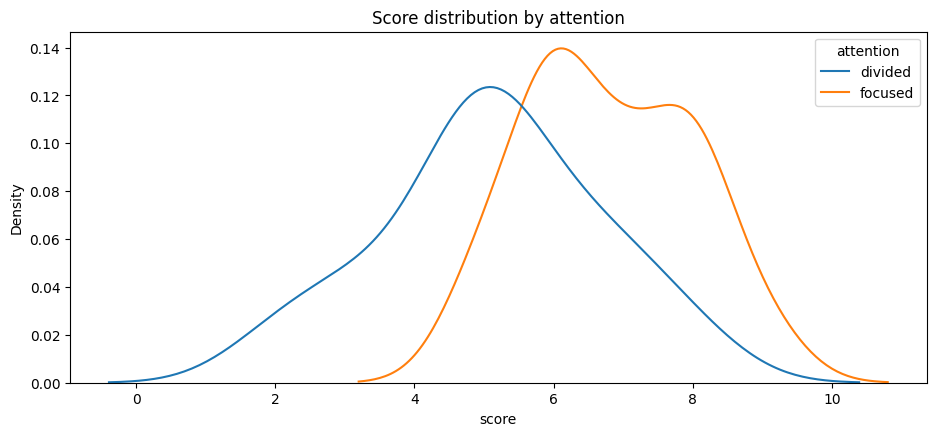

In [40]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.set_title("Score distribution by attention")
sns.kdeplot(data=attention_df, x="score", hue="attention", ax=ax)

fig.tight_layout(pad=3.0)

In [41]:
from scipy.stats import levene

In [42]:
score_focused = attention_df.query('attention == "focused"').score
score_divided = attention_df.query('attention == "divided"').score

In [43]:
_, pvalue_levene = levene(score_focused, score_divided)
pvalue_levene

0.5101591704956379

In [44]:
print(score_focused.var(), score_divided.var())

1.406896551724138 2.4772988505747127


# Prueba de Hipótesis No Paramétrica

Los 3 ejemplos de pruebas que vimos (excepto por la prueba Levene) son de una familia llamada pruebas de hipótesis paramétricas. Existe una familia de pruebas llamadas no paramétricas y la diferencia radica en los supuestos que se hacen sobre la distribución de los datos.

Si no podemos asumir que los datos vienen de una distribución conocida porque no tenemos evidencia (viendo las densidades de los datos), entonces habrá que usar una prueba de hipótesis no paramétrica.

Explicación intuitiva de una prueba no paramétrica:

    A pesar de que estas pruebas no asumen una distribución de los datos, podemos construir estadísticos que, por probabilidad, tendrán
    una distribución de probabilidad asociada. Pensemos en el ejemplo de en lugar de tomar los datos, tomamos sus posiciones ordenados
    de menor a mayor. Podemos imaginar un ejercicio de tomar datos de ambas muestras de manera aleatoria, fijarnos en sus posiciones y
    calcular la probabilidad de obtener consistentemente posiciones mayores de una muestra asumiendo que las distribuciones son iguales.

Una de estas pruebas es la llamada Mann-Whitney U Test donde se prueba si dos distribuciones son iguales o no.

Usemos esta prueba no paramétrica para contestar a la pregunta:
- ¿Podemos decir que la distribución de `score` para anagramas con 1 respuesta es igual que para anagramas con 2 respuestas?

Esta prueba se realiza como todas las anteriores:

1. Importe
```python
from scipy.stats import mannwhitneyu
```

2. Usen la prueba:
```python
statistic, p_value = mannwhitneyu(
      sample1,
      sample2
)
```

3. Establezcan su regla de decisión y concluyan.

# La prueba Kolmogorov-Smirnov

Hoy conoceremos la prueba Kolmogorov-Smirnov, la cual es muy útil para contestar la pregunta de si dos distribuciones de probabilidad son iguales.

Esta prueba solo se puede utilizar para distribuciones continuas y distribuciones que sean independientes entre sí.

Esta prueba tiene dos versiones:
1. Comparar dos conjuntos de datos para determinar si vienen de la misma distribución de probabilidad.
2. Comparar un conjunto de datos contra una distribución de probabilidad conocida.

Veamos la intuición de esta prueba.

La hipótesis nula se plantea de esta manera para los dos casos:

$$H_0: F_1(x) = F_2(x) \text{ vs. } H_a: F_1(x) \neq F_2(x)$$

Donde $F_1$ y $F_2$ son dos distribuciones de probabilidad.

## Ejemplo

Tomemos datos del dataset de especies Iris para contrastar la distribución de `sepal_width` de la especie "setosa" vs. la de "virginica". (Modificaremos tantito la columna para hacer las cosas más interesantes).

In [45]:
from typing import List

iris_df = sns.load_dataset('iris')
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [46]:
iris_df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

<AxesSubplot: xlabel='sepal_width', ylabel='Density'>

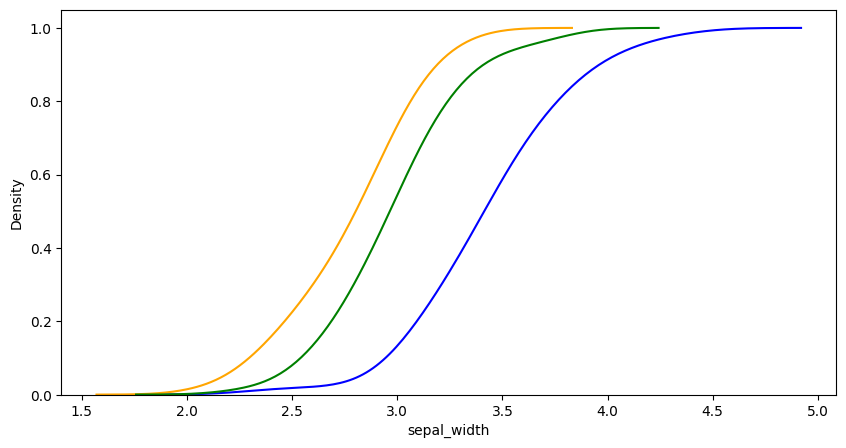

In [47]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.kdeplot(data=iris_df[iris_df["species"] == "setosa"], x="sepal_width", color="blue", cumulative=True, ax=ax)
sns.kdeplot(data=iris_df[iris_df["species"] == "versicolor"], x="sepal_width", color="orange", cumulative=True, ax=ax)
sns.kdeplot(data=iris_df[iris_df["species"] == "virginica"], x="sepal_width", color="green", cumulative=True, ax=ax)

En este caso, modificaremos la distribución de `sepal_width` (meramente con propósitos instruccionales) solo para la especie "virginica". Mostremos tanto la versión modificada como la no modificada para ver el cambio en la distribución que hicimos.

In [48]:
iris_df["modified_sepal_width"] = np.where(
    iris_df["species"] == "virginica",
    iris_df["sepal_width"] + 0.5,
    iris_df["sepal_width"]
)

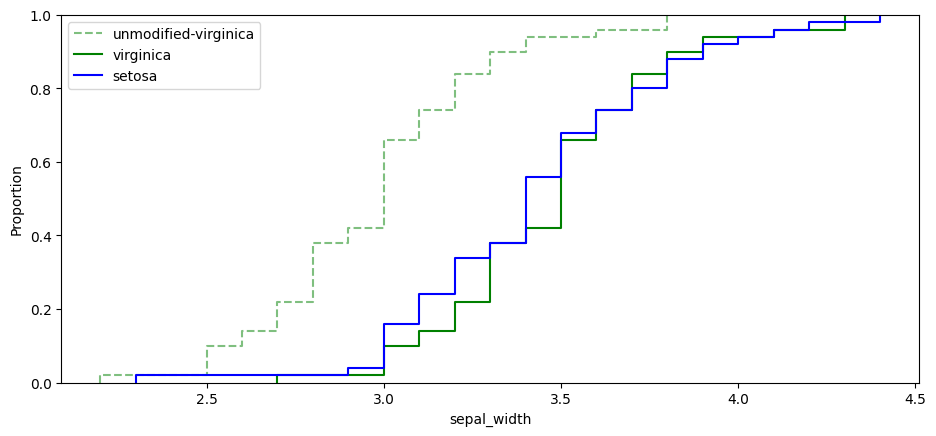

In [49]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.ecdfplot(data=iris_df[iris_df["species"] == "virginica"], x="sepal_width", color="green", ls="--", alpha=0.5, label="unmodified-virginica", ax=ax)

sns.ecdfplot(data=iris_df[iris_df["species"] == "virginica"], x="modified_sepal_width", color="green", label="virginica", ax=ax)
sns.ecdfplot(data=iris_df[iris_df["species"] == "setosa"], x="modified_sepal_width", color="blue", label="setosa", ax=ax)
ax.legend()

fig.tight_layout(pad=3.0)

En este caso, nos interesaría ver si la distribución de `sepal_width` (modificada) para la especie "setosa" es igual a la de la especie "virginica". Usemos la prueba de Kolmogorov-Smirnov para esto.

1. Planteamos las hipótesis:

$$F_{\text{virginica}}(x) = F_{\text{setosa}}(x) \text{ vs. } F_{\text{virginica}}(x) \neq F_{\text{setosa}}(x)$$

2. Determinemos un nivel de significancia. En este ejemplo, usemos un nivel del 2.5%.

3. Seleccionemos un estadísitico de prueba. En esta prueba, el estadístico es la máxima distancia vertical que hay entre una distribución y la otra.

Usando la libreria scipy

In [50]:
from scipy.stats import ks_2samp

ks_stat, p_value = ks_2samp(
    data1=iris_df[iris_df["species"] == "virginica"]["modified_sepal_width"],
    data2=iris_df[iris_df["species"] == "setosa"]["modified_sepal_width"]
)

print(f"""
KS stat: {ks_stat}
p-value: {round(p_value, 5)}
""")


KS stat: 0.14
p-value: 0.71665



Dado que el p-value es mayor que nuestro nivel de significancia del paso 2., fallamos en rechazar la  H0 .